# Notes

## Links

* [算法模板 repo](https://github.com/greyireland/algorithm-pattern)
* [BFS 模板](https://leetcode-cn.com/problems/ji-qi-ren-de-yun-dong-fan-wei-lcof/solution/bfsmo-ban-yi-ci-bei-hui-chu-chu-shi-yong-by-fuxuem/)
    * [同一作者寫的完整（？）模板](https://blog.csdn.net/fuxuemingzhu/article/details/101900729)
* [OA difficulty](https://www.reddit.com/r/cscareerquestions/comments/ejyffw/difficultyexamples_of_hackerrank_questions_for/)
    * Akuna 比 Google 難，最簡單的一題是 upper medium，也有 hard leetcode 數學題
    * Citadel: 3 leetcode mediums in 60 minutes (hard but you don’t need to get all 3 perfectly).
    * Two Sigma
        * 1 leetcode easy, 2 medium in 60 minutes
        * Easier side of medium, on-site interviews are harder
        * 要練到 20 分鐘可以做完 most mediums，10 分鐘可以做完大部份 easies
        * 又有說 2 questions in 3 hours, be ready for DP/Graphs/DFS, all that stuff
        * 考過 friend circle leetcode question
        * Relatively easy/on par with tech companies
        * [2 sample questions](https://leetcode.com/discuss/interview-question/algorithms/1968209/two-sigma-hacker-rank-code-assessment)
* [Teamblind's Curated List (75 題)](https://www.teamblind.com/post/New-Year-Gift---Curated-List-of-Top-75-LeetCode-Questions-to-Save-Your-Time-OaM1orEU)

## DP

### 44. Wildcard Matching

Use pattern as columns and string as index, both starting with an empty character (and $T_{0, 0}$ is True). 
\begin{align*}
T_{i, j} = 
\begin{cases}
T_{i-1, j-1} &\mbox{ if } (s_i==p_j) ~||~ (p_j==\text{'?'})\\
T_{i-1, j} ~||~ T_{i, j-1} &\mbox{ if } p_j==\text{'*'}\\
\text{False}
\end{cases}.
\end{align*}
First row is TTT... until the first non-asterisk character shows up, under which a sequence FFF... starts. First column is TFFFFF...

### 309. Best Time to Buy and Sell Stock with Cooldown
 
賣完之後不能隔天馬上買而是要等一天。


[兩個狀態的 DP](https://youtu.be/Ggzbo9eVrLU?t=92)
：h 和 u 分別為持有股票和空倉時，現金帳戶價值的最大值。把 prices 跑完時 u 的結尾即是答案。Transition function 的 max 裡第一項是第 n 天有改變狀態的情況，第二項是沒有改變狀態。


Base case hold 狀態因為買入股票，現金帳戶變成負值。第二天的 hold 是前兩天股票選便宜的那天買：


|p |8 |6 |4 |3 |3 |2 |3 |5 |8 |3 |8 |2 |6 |
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|h|-8|-6|
|u|0|


Transition: 


$$
\begin{pmatrix}
h_n\\
u_n
\end{pmatrix}
=
\begin{pmatrix}
\max(u_{n-2}-p_n, h_{n-1})\\
\max(h_{n-1}+p_n, u_{n-1})
\end{pmatrix}
$$

### 714. Best Time to Buy and Sell Stock with Transaction Fee

用兩個狀態的 DP，同 309，但只需要一天的 Base case。Transition function 改成

$$
\begin{pmatrix}
h_n\\
u_n
\end{pmatrix}
=
\begin{pmatrix}
\max(u_{n-1}-p_n, h_{n-1})\\
\max(h_{n-1}+p_n- f, u_{n-1})
\end{pmatrix}
$$

交易成本一定要加在賣掉那邊（從 hold 轉成 unhold）因為這兩個變數記的是現金帳戶價值。


### 188. Best Time to Buy and Sell Stock IV

最多可以交易 $k$ 次，[這裡](https://www.youtube.com/watch?v=oDhu5uGq_ic)看來的解答。

下面的答案是對的但在 LeetCode submit 不會過。如果遇到很長的 list 或 $k\gg n$ 時間或空間會爆。

|  | 2| 5| 7| 1| 4| 3| 1| 3|
|--|--|--|--|--|--|--|--|--|
| 0| 0| 0| 0| 0| 0| 0| 0| 0|
| 1| 0| 3| 5| 5| 5| 5| 5| 5|
| 2| 0| 3| 5| 5| 8| 8| 8| 8|
| 3| 0| 3| 5| 5| 8| 8| 8|10|


$$
T_{i, j} = \max
\begin{cases}
T_{i, j-1} \\
(p_j - p_m) + T_{i-1, m}\quad m=0, 1, \ldots, j-1
\end{cases}, 
$$

可再優化成

\begin{eqnarray*}
T_{i, j} &=& \max
\begin{cases}
T_{i, j-1} \\
p_j + \text{maxDiff}_j
\end{cases}\\\\
\text{maxDiff}_{j} &=& \max(\text{maxDiff}_{j-1},~T_{i-1, j} - p_j), 
\end{eqnarray*}

每一列初始 $\text{maxDiff}_0 = 0 - p_0$。


## Misc

### 829. Consecutive Numbers Sum

Consider
\begin{align*}
N &= m + (m+1) + (m+2) + \cdots + n\\
&= (n-m+1)(n+m)/2, 
\end{align*}
其中 $n-m+1$ 和 $n+m$ 一個是奇數，一個是偶數，而且已知 $n-m+1 > n+m$。所以所有 $N$ 的奇因數都確定了一組分解 $2N = (n-m+1)(n+m)$，從而確定了一組 $m$ 和 $n$ 的解。

```floor(sqrt(N))``` 遇到很大的 $N$ 會 overflow。python 能處理任意大的整數，但 ```sqrt``` 會先轉成 float 然後就有可能出錯。一個安全判斷一個正整數是否為平方數的方法是[牛頓法](https://miscbeginnersc.readthedocs.io/en/latest/math/fun.html#Checking-if-an-Integer-Is-a-Perfect-Square)。

### 239. Sliding Window Maximum

[Deque solution](https://youtu.be/TCHSXAu5pls?t=147)（video 裡存的是 index，這裡直接存數字）：
用一個 deque 存下 sliding window 裡的數字，並且要以 descending order。如果新進來的數不是最小的，就不斷 pop out 比它小的數直到它是最小的再 append。只要這個新進來的數存在，這些被 pop out 的數都不會是 sliding window maximum 所以可以直接 pop out。每次 slide 就檢查最左邊的數是不是應該被 pop out


### 123. Best Time to Buy and Sell Stock III

最多可以交易兩次。

Best Time to Buy and Sell Stock (121) 的解答有一個性質就是把 input 整個取負號再倒過來會得到一樣的結果，例如 maxProfit([5, 3, 6, 4]) 會等於 maxProfit([-4, -6, -3, -5])。

可以交易兩次相當於把長度 n 的 array 拆成兩半分別求 121 的 maxProfit 再加起來。有 n 種拆法，例如 [7, 1, 5, 3, 6, 4] = [7, 1] + [5, 3, 6, 4] 是其中一種。隨著分拆點推進，第一個數列變長，第二個數列變短。第一個數列直接丟 121 的解答（但要記下 running max profit，不能用 O(1) space 的作法），第二個數列先倒過來取負號再丟，這樣新增的才是後面的數而不是前面的。

下面 pass1 是在求 [7, 1, 5, 3, 6, 4] 的 121 解答，pass2 是求 [-4, -6, -3, -5, -1, -7] 的 121 解答。最後把其中一個 running max profit 倒過來和另一個相加，得到的數列就是用不同分拆點時得到的兩次交易 max profit。取 max 就是這題的答案。

### 986. Interval List Intersections

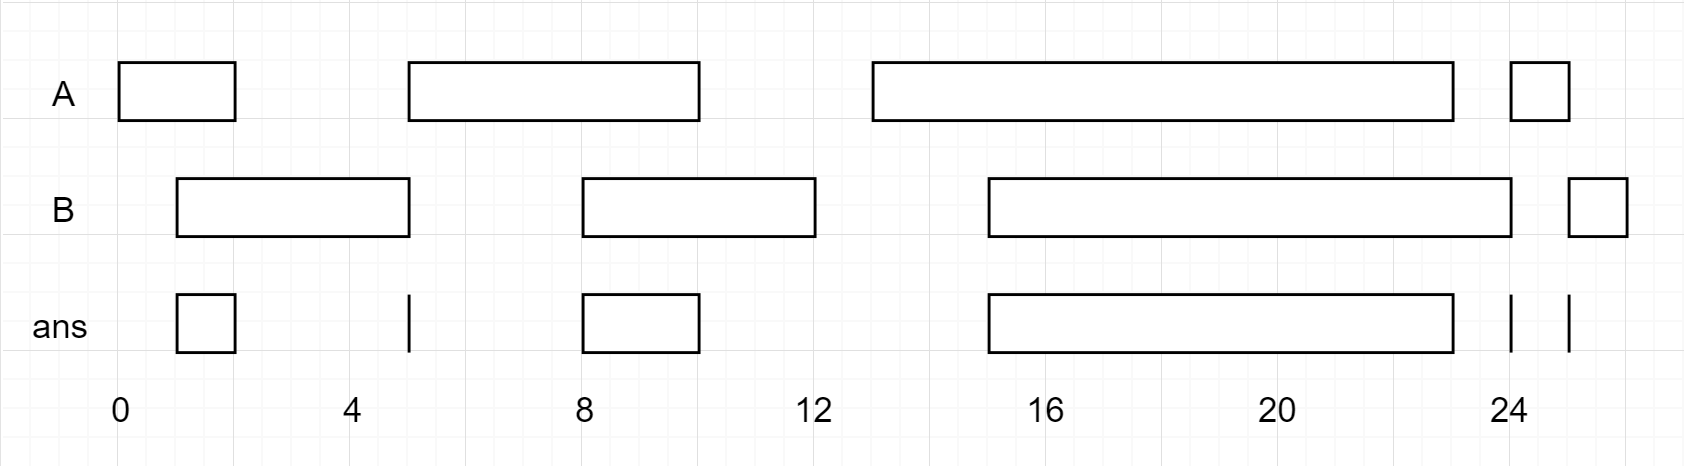

[用 two pointers 分別追蹤 A 和 B 的區間。](https://youtu.be/5xL_N2S3-QU?t=224)兩閉區間有重疊 iff $s \leq e$。如果題目改開區間則是 $s < e$。

### 969. Pancake Sorting

[最簡單的算法是 selection sort 變形：](https://zh.wikipedia.org/zh-tw/%E7%85%8E%E9%A4%85%E6%8E%92%E5%BA%8F)每次找出還沒排序的數之中最大的，先把它翻到最前面，再翻到還沒排序的部份的最後面。所以答案的偶數 subarray 會是 n, n-1, ...。看了 LeetCode 最快解法和一些 youtube，大家都只寫這種。


### 200. Number of Islands

每次踩到 1 就 DFS 把同一個島都著色成 0，並且 count 累加一次。

### 560. Subarray Sum Equals K

用一個 hash table 存下到目前為止，這個 cumsum 一共出現過幾次。

### 53. Maximum Subarray

用一個變數 curMax 去 track 當前數字結尾的所有 subarray 中產生最大的 sum

### 47. Permutations II

如果 input list 裡沒有重覆的數字，答案就是把每一個數字抓出來當開頭，剩下的拿去做 permutation（遞迴）。現在 input list 雖有重覆的數字，但重覆的數字只抓出來當開頭一次就會得到正確答案。例如 [1, 1, 1, 2, 2, 3, 3, 3, 3] 之中 1, 2, 3 各當開頭一次。第一個迴圈只是為了抓每個數字第一次出現時的 index。

### 15. 3Sum

可以用 two sum (see the 2nd cell below) 但既然都要 $O(n^2)$ 不如[先排序然後用三個指標從左右往中間靠近。](https://www.youtube.com/watch?v=aSVI-DekuTk)

### 121. Best Time to Buy and Sell Stock

直接找出最大和最小再相減行不通，因為可能出現先賣再買。但一邊求 running max profit 一邊 update current min 就不會有這個問題了。